In [1]:
import numpy as np
import dimod
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import VirtualGraphComposite

In [2]:
n = 3
N = n*n

R = np.random.random((n,2))
B = np.random.random((n,2))

D = np.empty((n,n))

for i in range(n):
    for j in range(n):
        D[i][j] = ( (R[i][0]-B[j][0])**2 + (R[i][1]-B[j][1])**2 )**(0.5)

print(D)
Q = {}
S = {}

[[0.66090737 0.85676071 0.27340286]
 [0.22709139 0.92577345 0.19087959]
 [0.97386517 0.34068072 0.62296666]]


In [3]:

lamba = 2
alpha = 2
print('Alpha: ' + str(alpha))
beta = 2

print('Beta: ' + str(beta))

for i in range(N):
    Q[(i,i)] = D[int(i/n)][i%n]- (alpha * lamba)

print('Q diagonal done.')

Alpha: 2
Beta: 2
Q diagonal done.


In [4]:

for i in range(N):
    for j in range(i+1,N):
        if int(i/n)==int(j/n) or i%n==j%n:
            Q[(i,j)] = beta * lamba
            S[(i,j)] = 1


In [5]:
from minorminer import find_embedding

sampler_wo_e = DWaveSampler(config_file='/home/manoj/.config/dwave/dwave.conf',profile='old',)

A = sampler_wo_e.edgelist
AD = sampler_wo_e.adjacency
print(AD)

embeddings, valid = find_embedding(S, A, verbose=1, return_overlap=1)

print(embeddings)
print 'valid = ', valid

#from dimod import embed_qubo

#targetQ = embed_qubo(Q, embeddings, AD)


print sampler_wo_e.properties['extended_j_range']  

sampler = VirtualGraphComposite(sampler_wo_e, embeddings)

{0: set([128, 4, 5, 6, 7]), 1: set([129, 4, 5, 6, 7]), 2: set([130, 4, 5, 6, 7]), 3: set([131, 4, 5, 6, 7]), 4: set([0, 1, 2, 3, 12]), 5: set([0, 1, 2, 3, 13]), 6: set([0, 1, 2, 3, 14]), 7: set([0, 1, 2, 3, 15]), 8: set([136, 12, 13, 14, 15]), 9: set([137, 12, 13, 14, 15]), 10: set([138, 12, 13, 14, 15]), 11: set([139, 12, 13, 14, 15]), 12: set([4, 8, 9, 10, 11, 20]), 13: set([5, 8, 9, 10, 11, 21]), 14: set([6, 8, 9, 10, 11, 22]), 15: set([7, 8, 9, 10, 11, 23]), 16: set([144, 20, 21, 22, 23]), 17: set([145, 20, 21, 22, 23]), 18: set([146, 20, 21, 22, 23]), 19: set([147, 20, 21, 22, 23]), 20: set([12, 16, 17, 18, 19, 28]), 21: set([13, 16, 17, 18, 19, 29]), 22: set([14, 16, 17, 18, 19, 30]), 23: set([15, 16, 17, 18, 19, 31]), 24: set([152, 28, 29, 30, 31]), 25: set([153, 28, 29, 30, 31]), 26: set([154, 28, 29, 30, 31]), 27: set([155, 28, 29, 30, 31]), 28: set([36, 20, 24, 25, 26, 27]), 29: set([37, 21, 24, 25, 26, 27]), 30: set([38, 22, 24, 25, 26, 27]), 31: set([39, 23, 24, 25, 26, 27]

initialized
embedding found.
max chain length 6; num max chains=2
reducing chain lengths
max chain length 4; num max chains=1
max chain length 3; num max chains=3
{0: [361, 489], 1: [357, 365], 2: [366, 363], 3: [494, 486], 4: [484, 482, 354], 5: [491, 492], 6: [493, 490], 7: [356, 362, 364], 8: [360, 488]}
valid =  1
[-2.0, 1.0]


In [7]:
print(sampler_wo_e.properties['default_annealing_time'], sampler_wo_e.properties['annealing_time_range'])
print(sampler_wo_e.properties['default_readout_thermalization'],
      sampler_wo_e.properties['default_programming_thermalization'],
      sampler_wo_e.properties['programming_thermalization_range'])
print(sampler_wo_e.properties['num_reads_range'])

(20, [1, 2000])
(0, 1000, [0, 10000])
[1, 10000]


In [8]:
num_reads = 1000
annealing_time= 200
#programming_thermalization=sampler.properties['default_programming_thermalization']
#print programming_thermalization

response = sampler.sample_qubo(Q, num_reads=num_reads, annealing_time=annealing_time)
#                               programming_thermalization=programming_thermalization)

print "response:", response

SolverFailureError: Linear coefficients out of h_range.

In [23]:
total_real_time = response.info['timing']['total_real_time']

timing = np.asarray(response.info['timing'].items())

In [24]:
configs = response.samples_matrix.astype(bool)
configs = np.asarray([ c.reshape(-1, n) for c in configs])

energy = response.data_vectors['energy']
freq = response.data_vectors['num_occurrences']

idx = np.argsort(-freq)

configs = configs[idx]
energy = energy[idx]
freq = freq[idx]

configs = [np.array(a).reshape(-1, n) for a in configs]

to_del = []

for c in range(len(configs)):
    row_sum = configs[c].sum(axis=0)
    col_sum = configs[c].sum(axis=1)
    if ( not (np.array_equal(row_sum,np.ones(n, dtype = int)))):
        to_del = np.append(to_del, int(c))
    else:
        if ( not (np.array_equal(col_sum,np.ones(n, dtype = int)))):
            to_del = np.append(to_del, int(c))
            
print format(to_del)

configs = np.delete(configs, to_del, axis=0)
energy = np.delete(energy, to_del)
freq = np.delete(freq, to_del)

print(configs)
print(energy)
print(freq)

[ 0.  3.  4.  9. 10. 11. 13. 14. 15.]
[[[ True False False]
  [False False  True]
  [False  True False]]

 [[False False  True]
  [ True False False]
  [False  True False]]

 [[False  True False]
  [ True False False]
  [False False  True]]

 [[ True False False]
  [False  True False]
  [False False  True]]

 [[False False  True]
  [False  True False]
  [ True False False]]

 [[False  True False]
  [False False  True]
  [ True False False]]

 [[False  True False]
  [ True False False]
  [False False  True]]

 [[False False  True]
  [ True False False]
  [False  True False]]]
[-10.92533148 -10.85960471 -10.12058892 -10.12859611 -10.50430624
 -10.56202581 -10.12058892 -10.85960471]
[140 130  37  16  13  12   1   1]


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:28: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:29: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:30: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future


In [25]:
cost=np.zeros(len(configs))

for c in range(len(configs)):
    for i in range(n):
        for j in range(n):
            if (configs[c])[i][j] == 1:
                cost[c] += D[i][j]

print(cost)

[1.07466852 1.14039529 1.87941108 1.87140389 1.49569376 1.43797419
 1.87941108 1.14039529]


[[ True False False]
 [False False  True]
 [False  True False]]
1.0746685213122795
('Found a valid min cost result at index ', 0)
('The count of min cost in valid results is ', 1)
('The frequency of min cost in valid results is ', 140)


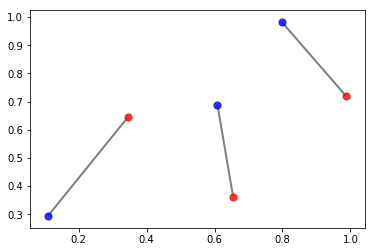

In [26]:
#Brute Force Minimum Check
import itertools as it
import math

f_n = math.factorial(n)

P=np.empty((f_n,n))
    
for i,j in enumerate(it.permutations(range(n))):
    P[i] = j

min_cost = 100

for item in P:
    perm_cost = 0
    for j in range(n):
        perm_cost += D[j][ int(item[j]) ]
    
    if perm_cost < min_cost:
        min_cost = perm_cost
        min_cost_config = item

min_config = np.zeros((n,n), dtype=bool)

for i in range(n):
    min_config[i][ int(min_cost_config[i]) ]=1
    
print(min_config)
print(min_cost)

min_count_cost = 0
min_frequency_count = 0

for c in range(len(configs)):
    if (cost[c] == min_cost): 
        min_count_cost += 1
        min_frequency_count += freq[c]
        print("Found a valid min cost result at index ", c)

print("The count of min cost in valid results is ", min_count_cost)
print("The frequency of min cost in valid results is ", min_frequency_count)

import networkx as nx
import matplotlib.pyplot as plt

G=nx.empty_graph()

nx.draw_networkx_nodes(G,pos=np.concatenate((R,B)),nodelist=range(n),node_color='r',node_size=50,alpha=0.8)
nx.draw_networkx_nodes(G,pos=np.concatenate((R,B)),nodelist=range(n,2*n),node_color='b',node_size=50,alpha=0.8)

E = []

for i in range(n):
    for j in range(n):
        if min_config[i][j]==1:
            E.append((i,n+j))

nx.draw_networkx_edges(G,pos=np.concatenate((R,B)),edgelist=E,width=2,alpha=0.5,edge_color='k')

plt.show()

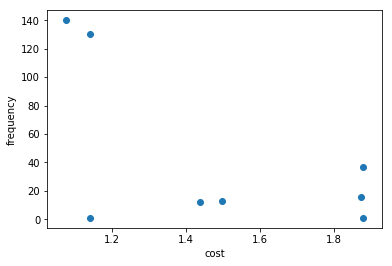

<Figure size 720x720 with 0 Axes>

In [27]:
plt.scatter(cost, freq)
plt.xlabel('cost')
plt.ylabel('frequency')

plt.figure(figsize=(10,10), facecolor='w', edgecolor='w')
plt.show()



Rows and Columns:  3 x 3 





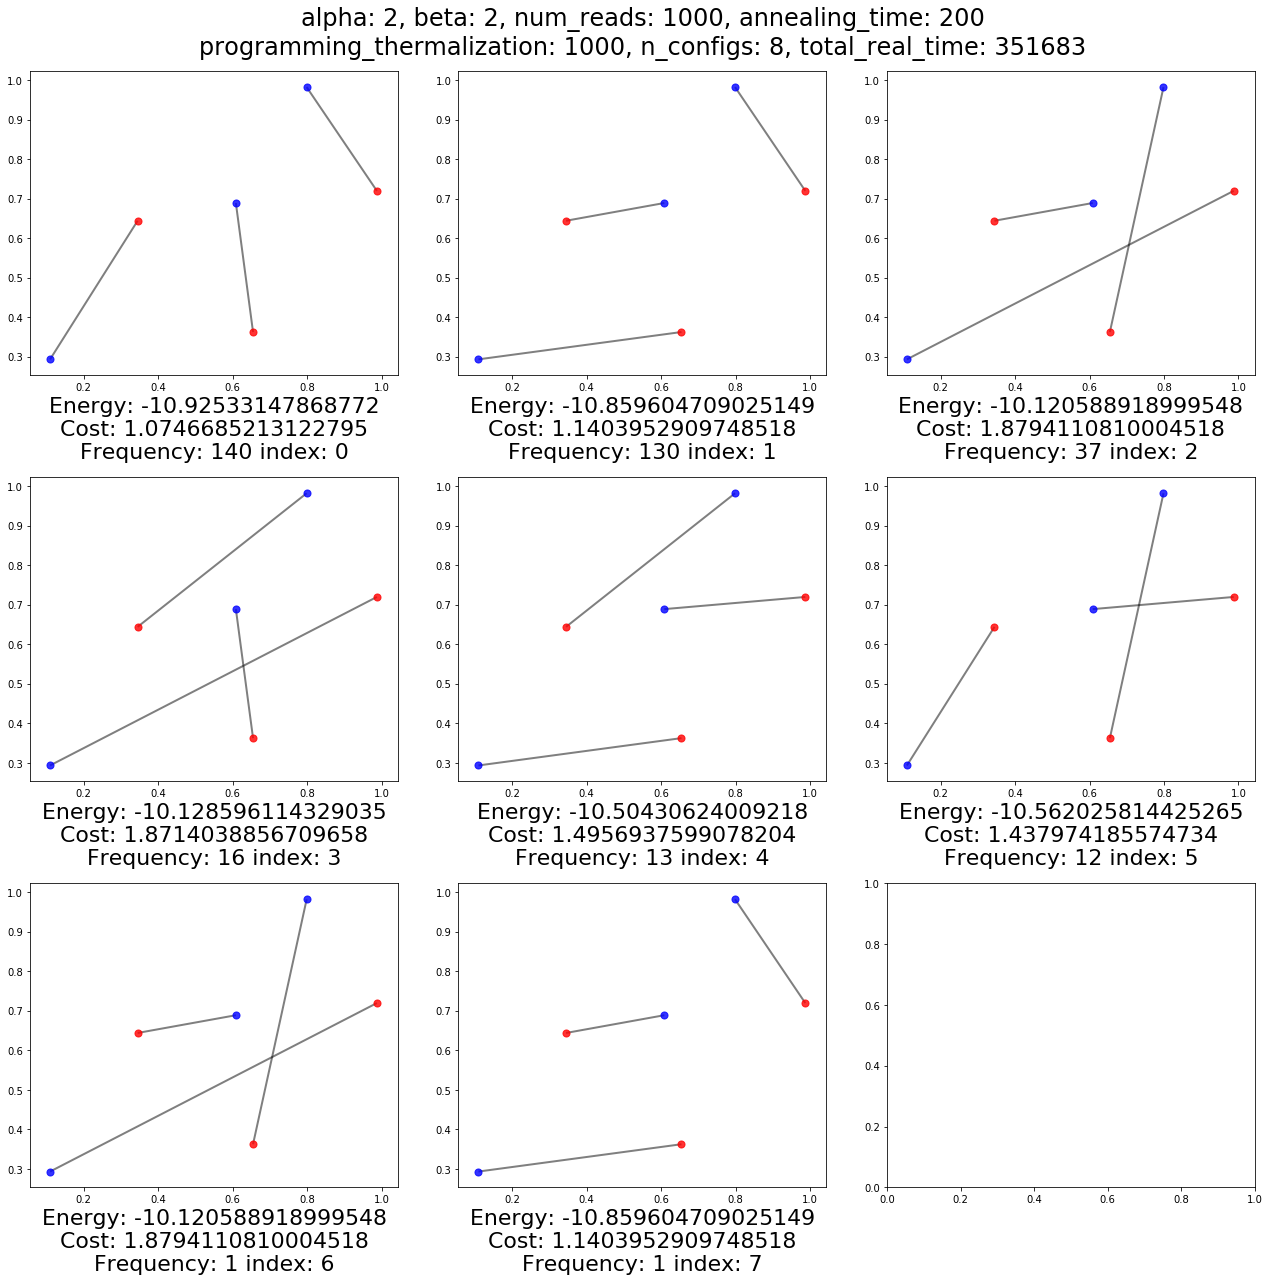

In [28]:
import networkx as nx

n_configs = len(configs)
n_cols = 3
n_rows = int(np.ceil(float(n_configs)/n_cols))

print '\nRows and Columns: ', n_rows, 'x', n_cols, '\n\n\n'
f, axarr = plt.subplots(n_rows, n_cols, figsize=(6*n_cols,6*n_rows), squeeze=False)

f.patch.set_facecolor('white')

for i in range(n_rows):
    for j in range(n_cols):
        k = i*n_cols+j
        if k<n_configs:
            axarr[i][j].set_xlabel('Energy: ' + str(energy[k]) + '\nCost: ' + str(cost[k])
                               + '\nFrequency: ' + str(freq[k]) + ' index: ' + str(k), fontsize=22 )
            
        #axarr[i][j].set_aspect(aspect=1, adjustable='box')

G=nx.empty_graph()

for c in range(n_configs):
       
    nx.draw_networkx_nodes(G,pos=np.concatenate((R,B)),nodelist=range(n),node_color='r',node_size=50,alpha=0.8, ax=axarr[c/n_cols,c%n_cols])
    nx.draw_networkx_nodes(G,pos=np.concatenate((R,B)),nodelist=range(n,2*n),node_color='b',node_size=50,alpha=0.8, ax=axarr[c/n_cols,c%n_cols])

    E = []

    for i in range(n):
        for j in range(n):
            if configs[c][i][j]==1:
                E.append((i,n+j))

    nx.draw_networkx_edges(G,pos=np.concatenate((R,B)),edgelist=E,width=2,alpha=0.5,edge_color='k', ax=axarr[c/n_cols,c%n_cols])
    
f.tight_layout(rect=[0, 0.03, 1, 0.978])
plt.suptitle('alpha: '+str(alpha)+', beta: '+str(beta)+', num_reads: '+str(num_reads)+
             ', annealing_time: '+str(annealing_time)+
             '\nprogramming_thermalization: '+str(programming_thermalization)+
             ', n_configs: '+str(n_configs)+', total_real_time: '+str(total_real_time), verticalalignment='baseline', fontsize=24)
plt.show()

In [29]:
np.savez('outputs/'+str(n)+'_dwave_ocean', R=R, B=B, alpha=alpha, beta=beta, num_reads=num_reads,
         annealing_time=annealing_time, programming_thermalization=programming_thermalization,
        configs=configs, energy=energy, freq=freq, timing=timing)